<a href="https://colab.research.google.com/github/ademoh123/ademoh123/blob/main/A_Simple_Convolutional_Neural_Network_(CNN)_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize & reshape
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Normalize & reshape

In [4]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Step 4: Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Another Conv layer
    layers.MaxPooling2D((2, 2)),  # Another Pooling layer
    layers.Flatten(),  # Flatten to feed into Dense layers
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8943 - loss: 0.3488 - val_accuracy: 0.9822 - val_loss: 0.0552
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9863 - val_loss: 0.0406
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9907 - val_loss: 0.0273
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9846 - val_loss: 0.0463
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9912 - val_loss: 0.0304
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9919 - val_loss: 0.0332
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9975 - loss: 0.0076 - 

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [8]:
# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9876 - loss: 0.0497
Test Accuracy: 0.9908


In [9]:
# Step 8: Plot Training Loss and Accuracy
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

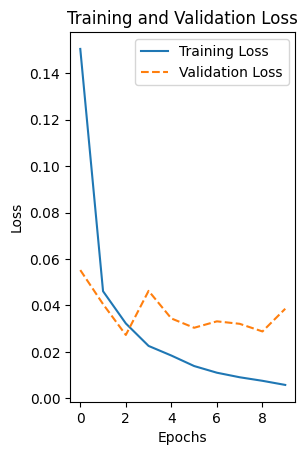

In [10]:
# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

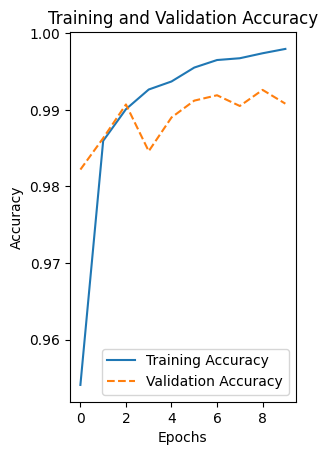

In [11]:
# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [12]:
# Step 9: Make Predictions
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


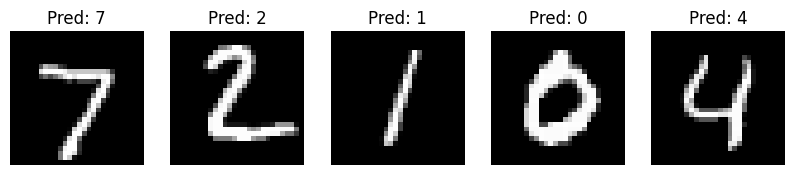

In [13]:
# Step 10: Display Some Predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i]}")
    ax.axis('off')

plt.show()